<a href="https://colab.research.google.com/github/cdstreiff/MAT421---Applied-Computational-Methods/blob/main/MAT421SectionD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Section D HW - MAT421
## Carson Streiff

As this section explores linear algebra concepts, I will try to create my own functions rather than using those built into numpy. I will however use some functions to make the basic matrix arithmetic easier.

### 1.2 Inner product function
This function is used to compute the inner product of two vectors, a useful operation for later.

In [ ]:
import numpy as np

def inner(a,b):

  if len(a) != len(b):
    raise Exception("Incompatible vector sizes for inner product.")

  sum = 0
  for i in range(0,len(a)):
    sum += a[i] * b[i]
    
  return sum

inner([1,2],[3,4])

11

### 1.2 Norm calculation
Taking the norm of a vector will also be useful.

In [ ]:
def norm(a):
  sum = 0
  for i in range(0,len(a)):
    sum += a[i]**2
  return np.sqrt(sum)

norm([0,3,-4])

5.0

###1.2 Gram-Schmidt orthogonalization process
This function gs implements the Gram-Schmidt algorithm, which when given a set of linearly independent, creates an orthonormal basis of the span (all linear combinations of) those vectors.

In [ ]:
def gs(a):

  u = np.zeros([len(a),len(a[0])])
  
  
  #first term
  u[0] = a[0] / norm(a[0])

  for i in range(1,len(a)):
    
    #compute residual
    e = a[i]
    for j in range(i,0,-1):
      e -= inner(a[i],u[j-1]) * u[j-1]
    
    u[i] = e / norm(e)


  return u

print(gs([[1,1,0],[1,0,1],[0,1,1]]).transpose())

[[ 0.70710678  0.40824829 -0.57735027]
 [ 0.70710678 -0.40824829  0.57735027]
 [ 0.          0.81649658  0.57735027]]


### 1.3 QR decomposition
This function decomposes a given matrix into the product of a of two matrices - the Gram-Schmidt computed orthonormal basis Q and a nonsingular upper-triangular matrix R.


In [ ]:
def qr(a):
  q = gs(a)
  r = np.zeros([len(a),len(a)])
  

  for i in range(0,len(a),1):

    for j in range(0,i+1,1):

      r[i][j] = inner(a[i],q[j])

  return([q,r])
  

result = qr([[1,1,1,1],[-1,4,4,-1],[4,-2,2,0]])

print("Q:")
print(result[0].transpose())
print("R:")
print(result[1].transpose())

Q:
[[ 0.5 -0.5  0.5]
 [ 0.5  0.5 -0.5]
 [ 0.5  0.5  0.5]
 [ 0.5 -0.5 -0.5]]
R:
[[ 2.  3.  2.]
 [ 0.  5. -2.]
 [ 0.  0.  4.]]


### 1.3 Linear regression
This function uses the previously defined QR decomposition method to solve for the least-squares solution to a given set of points, and plots the corresponding line of best fit to the data.

Function coefficients:
[96.25245375  0.33587001]


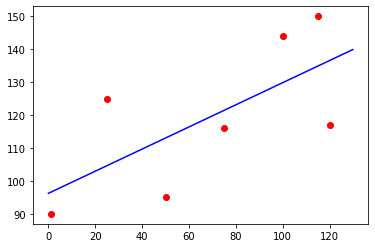

In [ ]:
import matplotlib.pyplot as plt

def linreg(a,b):
  [q,r] = qr(a)
  
  #using matrix arithmetic to solve Rx = Q'b
  r_inv = np.linalg.inv(r.transpose())
  q_trans = q

  temp = np.matmul(r_inv,q_trans)
  
  return np.matmul(temp,b)

#------Enter values here--------------------------------------------

x_values = [1,25,50,75,100,115,120]
y_values = [90,125,95,116,144,150,117]

x_new = np.arange(0,130,0.1)

#--------------------------------------------------------------------

x_temp = []
for i in range(0,len(x_values)):
  x_temp.append([1,x_values[i]])

A = np.array(x_temp)

coef = linreg(A.transpose().tolist(),y_values)

print("Function coefficients:")
print(coef)

plt.plot(x_values,y_values,'ro')



y_new = x_new*coef[1] + coef[0]

plt.plot(x_new,y_new,'b')

